<a href="https://colab.research.google.com/github/DT2024/Ecommerce_Orders/blob/main/Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
data = pd.read_csv("Ecommerce Customers_Kaggle.csv")

In [ ]:
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


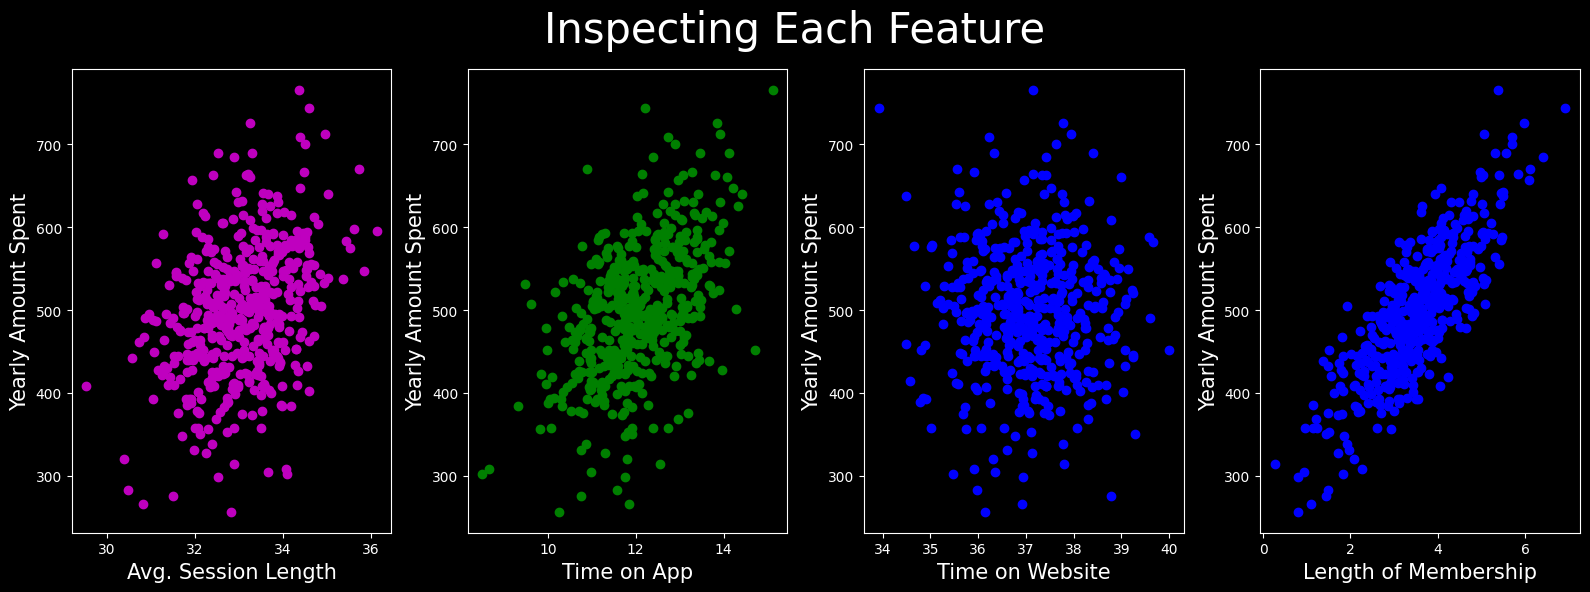

In [ ]:
#Looking above it is understood right away that email, address and avatar features  couldn't be affected to the dependent
#As a result, automatically 4 are left and since the assignment asking 4 features to choose
#Visualising
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(16,6))
plt.suptitle('Inspecting Each Feature', fontsize = 30)

axes[0].plot(data['Avg. Session Length'],data['Yearly Amount Spent'],'mo')
axes[0].set_ylabel("Yearly Amount Spent", fontsize = 15)
axes[0].set_xlabel("Avg. Session Length", fontsize = 15)

axes[1].plot(data['Time on App'],data['Yearly Amount Spent'],'go')
axes[1].set_ylabel("Yearly Amount Spent", fontsize = 15)
axes[1].set_xlabel("Time on App", fontsize = 15)

axes[2].plot(data['Time on Website'],data['Yearly Amount Spent'],'bo')
axes[2].set_ylabel("Yearly Amount Spent", fontsize = 15)
axes[2].set_xlabel("Time on Website", fontsize = 15)

axes[3].plot(data['Length of Membership'],data['Yearly Amount Spent'],'bo')
axes[3].set_ylabel("Yearly Amount Spent", fontsize = 15)
axes[3].set_xlabel("Length of Membership", fontsize = 15)

plt.tight_layout();

In [ ]:
X = data.iloc[:,3:7].values

In [ ]:
X

array([[34.49726773, 12.65565115, 39.57766802,  4.08262063],
       [31.92627203, 11.10946073, 37.26895887,  2.66403418],
       [33.00091476, 11.33027806, 37.11059744,  4.1045432 ],
       ...,
       [32.64677668, 11.49940906, 38.33257633,  4.95826447],
       [33.32250105, 12.39142299, 36.84008573,  2.33648467],
       [33.71598092, 12.41880832, 35.77101619,  2.73515957]])

In [ ]:
y = data.iloc[:,-1].values

In [ ]:
y = y.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_test.shape

(100, 4)

In [ ]:
X_train.shape

(400, 4)

In [ ]:
y_train.shape

(400, 1)

In [ ]:
X_train

array([[33.78015676, 11.91763618, 36.84473382,  3.63499601],
       [34.27824788, 11.82272175, 36.30854529,  2.11738254],
       [32.61785606, 13.98959256, 37.1905038 ,  4.06454855],
       ...,
       [31.81248256, 10.88692118, 34.89782769,  3.12863886],
       [32.25997327, 14.13289346, 37.02347924,  3.76207044],
       [32.42569728, 11.44890154, 37.58019043,  2.58696798]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
model = nn.Sequential(
          nn.Linear(4,1),
)

model

Sequential(
  (0): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
learningRate = 0.01
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learningRate)

In [ ]:
epochs = 1001
losses = torch.zeros(epochs)

for epoch in range(epochs):
    ypred = model(X_train)
    loss = lossfunc(ypred,y_train)
    losses[epoch] = loss

    if (epoch % 100) == 0:
     print(f'epochs : {epoch} loss : {loss.detach(): 1.2f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs : 0 loss :  258313.08
epochs : 100 loss :  4616.58
epochs : 200 loss :  175.04
epochs : 300 loss :  97.21
epochs : 400 loss :  95.85
epochs : 500 loss :  95.82
epochs : 600 loss :  95.82
epochs : 700 loss :  95.82
epochs : 800 loss :  95.82
epochs : 900 loss :  95.82
epochs : 1000 loss :  95.82


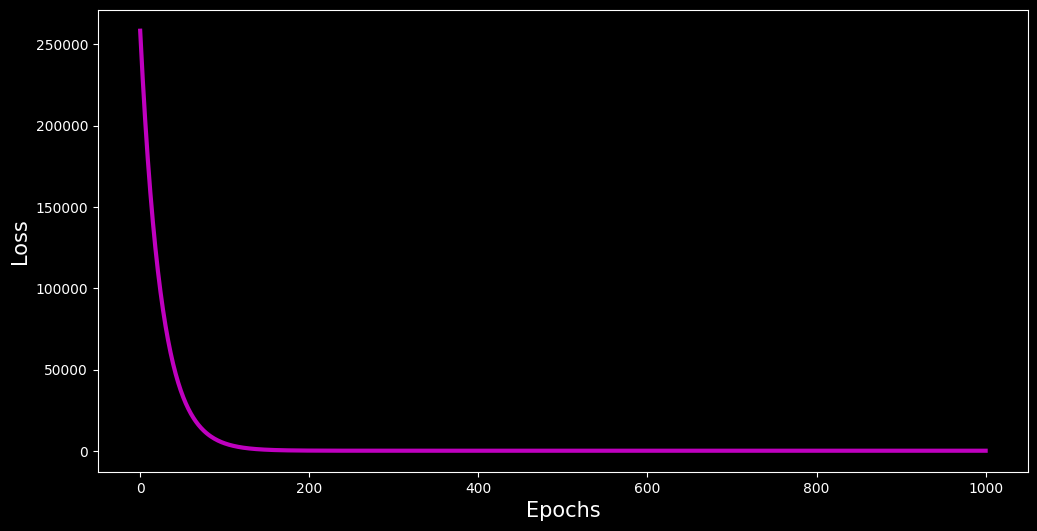

In [ ]:
plt.figure(figsize =(12,6))
plt.plot(np.arange(epochs), losses.detach(), 'm', lw = 3)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

In [ ]:
print(model[0].weight.detach().numpy())
print(model[0].bias.detach().numpy())

[[25.250336   38.70342     0.31547287 63.543125  ]]
[501.9914]


In [ ]:
y_pred = model(X_test)

In [ ]:
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()

In [ ]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

RMSE: 10.481527154905597
MAE: 2.9254689680222774
R2: 0.9778133034706116


In [ ]:
#Now Let's see with the TensorFlow by importing the libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


In [ ]:
#Then since of visualising the data and importing it are already done with pytorch I will just continue with the model
model2 = Sequential()

model2.add(Dense(units = 1, input_shape =(4,), activation = None))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01) ,loss='mse')

In [ ]:
history = model2.fit(X_train,y_train, epochs = 1001) # Default Batch size = 32, therefore iterations = 800/32 = 25

Epoch 1/1001
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 230590.7969  
Epoch 2/1001
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 137033.5469 
Epoch 3/1001
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79433.7500  
Epoch 4/1001
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48195.2539 
Epoch 5/1001
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27636.9668 
Epoch 6/1001
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16543.9395 
Epoch 7/1001
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9798.5195   
Epoch 8/1001
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5930.6719  
Epoch 9/1001
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3424.4309  
Epoch 10/1001
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2043.8491  
Epoch 11/1001
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1253.1951  
Epoch 12/1001
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 787.4322 
Epoch 13/1001
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 503.6546 
Epoch 14/1001
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

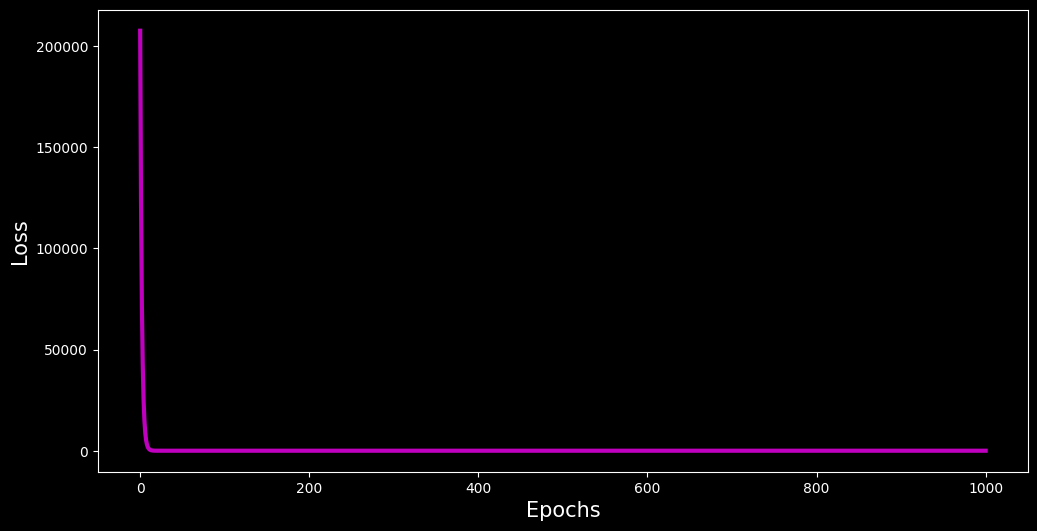

In [ ]:
plt.figure(figsize =(12,6))
plt.plot(history.history['loss'],'m', lw = 3, label= 'Training Loss')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

In [ ]:
print("Weights are :" )
print(model2.layers[0].get_weights()[0])

print(" ")

print("Bias is :" )
print(model2.layers[0].get_weights()[1])

Weights are :
[[25.288471  ]
 [38.72261   ]
 [ 0.31179255]
 [63.520287  ]]
 
Bias is :
[502.01654]


In [ ]:
y_pred = model2.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

RMSE: 10.478800125739363
MAE: 2.925455928383816
R2: 0.977824866771698
